In [11]:
# 67の前半と同じ

from gensim.models import KeyedVectors
import polars as pl

# モデルのロード
model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)

# country.csvは国名一覧が描かれrているテキストファイル
df = pl.read_csv("country.csv", separator="\t", new_columns=["country"])

# モデルに含まれている国名のみを抽出したリスト([国名,ベクトル]のリスト)
country_in_model = [country for country in df["country"].to_list() if country in model]

import torch
import numpy as np

country_vectors = torch.stack([torch.from_numpy(model[country].astype(np.float32)) for country in country_in_model])

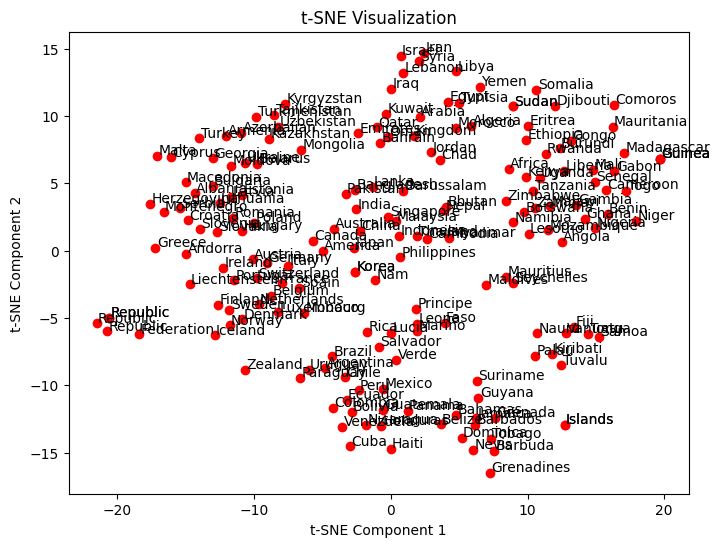

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNEで次元削減
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(country_vectors)

# グラフ作成
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='red')

for i, country in enumerate(country_in_model):
    plt.text(reduced_vectors[i, 0] + 0.1, reduced_vectors[i, 1] + 0.1, country)


plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()
